In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#importing the Keras models and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
#importing the training dataset
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
dataset_train.shape

(1258, 6)

In [ ]:
#feature scaling
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
#creating a data with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)

#resape
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#initialising the RNN
regressor=Sequential()

In [ ]:
#adding the first LSTM and some Dropout reguarisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
#adding second LSTM layer and some dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
#adding third LSTM layer and some Dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
#adding fourth LSTM layer and some Dropout
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [ ]:
#adding the output layer
regressor.add(Dense(units=1))

In [ ]:
#compile the rnn
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#fit the rnn to training set
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 124ms/step - loss: 0.1040
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0038
Epoch 13/100

In [ ]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total=pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60: ].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


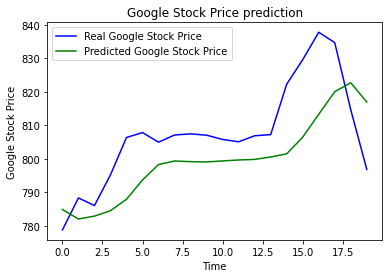

In [ ]:
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='green', label="Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()